## Аналитика в авиакомпании

<a name="project"></a>
### Описание проекта

Российская авиакомпания выполняет  внутренние пассажирские авиаперевозки, сотни перелётов каждый день. 

Ранее мы проанализировали спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали России и увидели, что в фестивальное время спрос на авиабилеты не изменяется. Получается, что на российские фестивали люди добираются не на самлолетах, а возможно, на поездах или машинах; также возможно, что большинство людей посещают только местные фестивали.

В данном проекте нам **важно понять предпочтения пользователей**, покупающих билеты на те или иные направления. И предложить рекомендации, чтобы увеличить спрос пользователей на авиаперелеты. 

<a name="load"></a>
### Ознакомимся с данными.


В данном задании мы изучили базу данных и нашли количество рейсов для каждой модели самолёта с вылетом в сентябре 2018 года; и посчитали среднее количество прибывающих рейсов в день для каждого города за август 2018 года.


Посмотрим на количество рейсов для каждой модели самолетов в сентябре 2018 года.

In [3]:
data1 = data1.sort_values('flights_amount', ascending=False).reset_index(drop=True)
data1

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В данных 8 различных объектов/моделей самолетов. Модель имеет тип object и количетсов рейсов имеет тип int64. 

Посмотрим на второй файл, среднее количество рейсов, прибывающих в город за день в августе 2018.

In [5]:
data3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
data3.duplicated().sum() # проверка на дуликаты

0

В данных 101 различных объектов/городов. Название города имеет тип object и среденее количество рейсов за день имеет тип float64. 

<a name="preprocess"></a>
### Подготовка данных.

- Преобразуем количество рейсов в int16 (от -32768 до 32767).

- Преобразуем среднее количество рейсов к float16.

- Округлим с помощью функции round среденее количетсво рейсов до двух значений после запятой.

In [8]:
data1['flights_amount'] = data1['flights_amount'].astype('int16')
data3['average_flights'] = data3['average_flights'].astype('float16')
data3 = round(data3, 2)

<a name="analysis"></a>
### Исследование данных.

*1) Посмотрим, какие модели самолетов самые популярные среди пассажиров.*

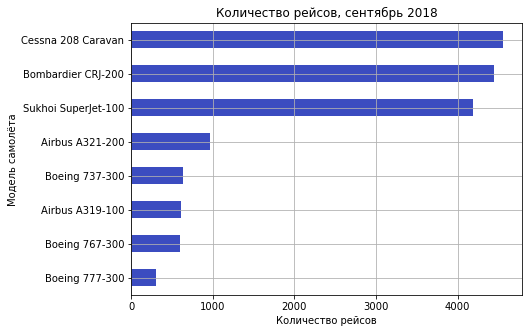

In [9]:
data1.sort_values(by='flights_amount').plot(x='model', grid=True, kind='barh', colormap='coolwarm', figsize=(7,5), legend = '')
plt.title('Количество рейсов, сентябрь 2018')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолёта')
plt.show()

Наибольшее количетсво рейсов за сентябрь, 4000-4500, у относительно небольших самолетов, вмещающих до 100 человек:
  - Cessna 208 Caravan (базовая модель перевозит девять пассажиров), 
  - Bombardier CRJ-200 (50-местные), 
  - Sukhoi SuperJet-100 (98 человек).


Наименьшее количество рейсов за сентябрь, менее 1000, у более больших моделей самолетов, вмещающих более 100 и до 550 человек (Boeing 777-300). 

*2) Посмотрим на среднее количество прибывающих рейсов в день для каждого города.*

In [10]:
data3['average_flights'].describe()

count    101.000000
mean       5.496094
std       13.117188
min        1.000000
25%        2.000000
50%        3.000000
75%        5.871094
max      129.750000
Name: average_flights, dtype: float64

Для 75% городов количество прибывающих рейсов в день не более 6.

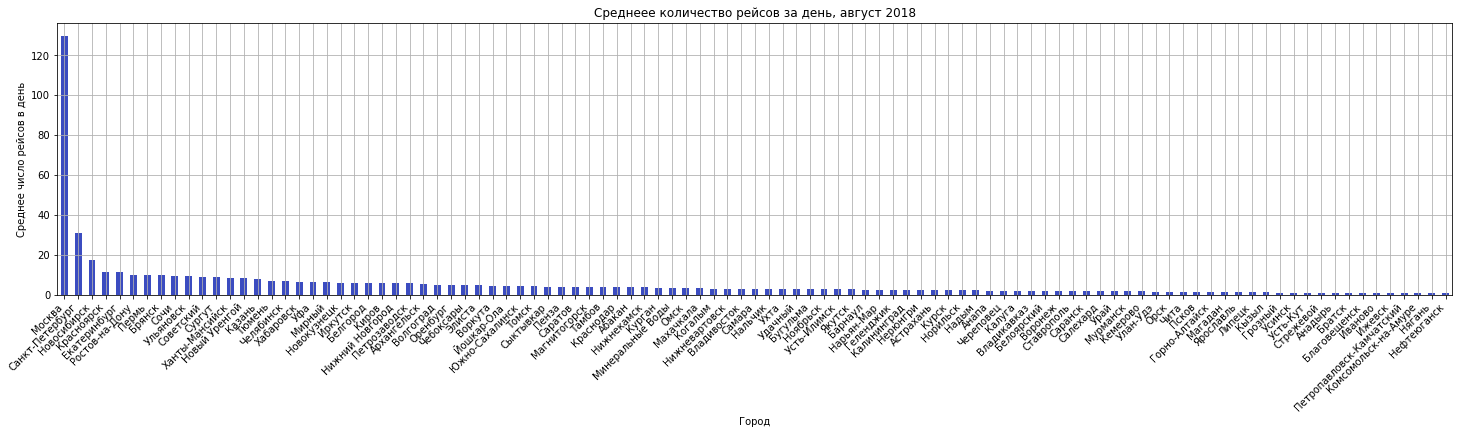

In [11]:
data3.sort_values(by='average_flights', ascending=False).plot(x='city', grid=True, kind='bar', figsize=(25,5), colormap='coolwarm', legend='')
plt.title('Среднеее количество рейсов за день, август 2018')
plt.xlabel('Город')
plt.ylabel('Среднее число рейсов в день')
plt.gca().set_xticklabels(data3.sort_values(by='average_flights', ascending=False)['city'], rotation=45, horizontalalignment= 'right')
plt.show()

На график выделяется тройка городов. Москва ялвяется несомненным лидером по среднему числу прибывающих рейсов в день (более 120). На втором месте находится Санкт-Петербург (чуть более 30 рейсов). На третьем месте также с заметным отрывом - Новосибирск (около 17 рейсов в среднем прибыващих рейсов в день).

Далее идет большой кластер из 98 городов, в которые прибывают от 12 до 1 рейсов за день. 

Данный график не очень наглядный для городов, в котрых немного прибывающих рейсов в день. Ниже разобъем все города на три группы: сначала выделим топ-10 городов, у которых среденее количетство прибывающих рейсов более 9; во второй группе рассмотрим 20 городов, у которых среденее количество прибывающих рейсов от 5 до 9; и в третьей, самой многочисленной группе, посмотрим 71 город, у которых среденее количество прибывающих рейсов в день от 5 до 1.

*a) Выберем топ-10 городов по количеству рейсов.*

In [12]:
top_10 = data3.sort_values(by='average_flights', ascending=False)[:10]
top_10

,city,average_flights
43,Москва,129.750000
70,Санкт-Петербург,31.156250
54,Новосибирск,17.328125
33,Красноярск,11.578125
20,Екатеринбург,11.320312
67,Ростов-на-Дону,10.203125
63,Пермь,10.140625
10,Брянск,10.000000
74,Сочи,9.609375
84,Ульяновск,9.578125


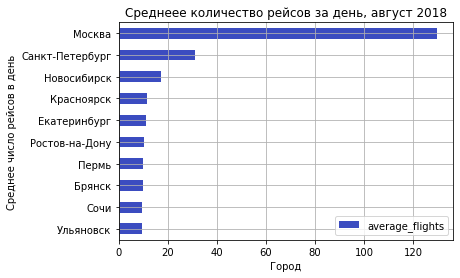

In [13]:
top_10.sort_values('average_flights', ascending=True).plot(x='city', grid=True, kind='barh', colormap='coolwarm')
plt.title('Среднеее количество рейсов за день, август 2018')
plt.xlabel('Город')
plt.ylabel('Среднее число рейсов в день')
plt.show()

- в Москве больше всего рейсов в день - в срерднем более 120.

- Санкт-Петербург занимает всторое место - в среднем более 30 рейсов в день.

- Далее Новосибирск, Красноярск, Екатринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновс - в среднем от 9 до 12 рейсов в день.

*б) Рассмотрим следуюшую группу 20 городов со средним количеством рейсов в день от 5 до 9.*

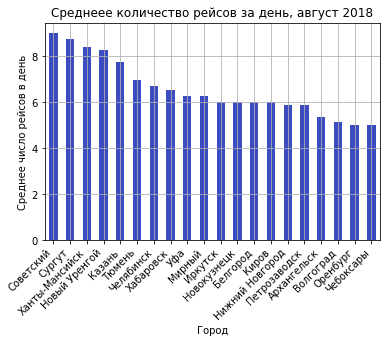

In [14]:
data3.sort_values(by='average_flights', ascending=False)[10:30].sort_values('average_flights', ascending=False).plot(x='city', grid=True, kind='bar', colormap='coolwarm', legend='')
plt.title('Среднеее количество рейсов за день, август 2018')
plt.xlabel('Город')
plt.ylabel('Среднее число рейсов в день')
plt.gca().set_xticklabels(data3.sort_values(by='average_flights', ascending=False)[10:30].sort_values('average_flights', ascending=False)['city'], rotation=45, horizontalalignment= 'right')
plt.show()

*3) И самая многичленная группа городов: в 71 городах (из 101) в среднем в день менее 5 рейсов.*

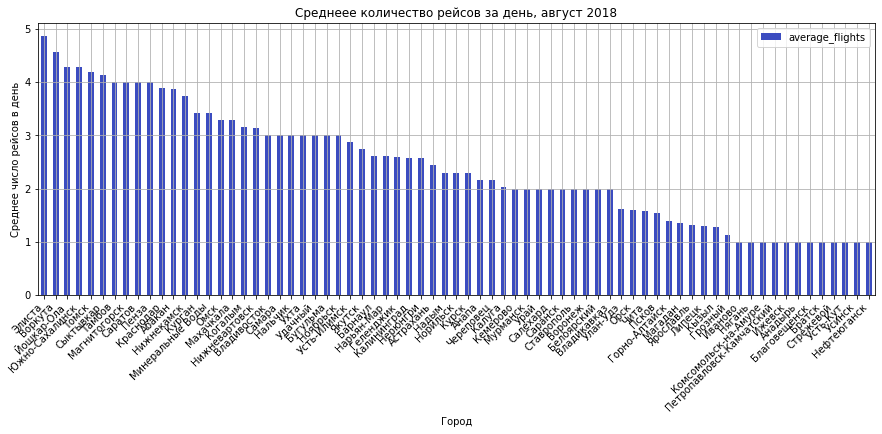

In [15]:
data3.sort_values(by='average_flights', ascending=False)[30:].sort_values('average_flights', ascending=False).plot(x='city', grid=True, kind='bar', figsize=(15,5), colormap='coolwarm')
plt.title('Среднеее количество рейсов за день, август 2018')
plt.xlabel('Город')
plt.ylabel('Среднее число рейсов в день')
plt.gca().set_xticklabels(data3.sort_values(by='average_flights', ascending=False)[30:].sort_values('average_flights', ascending=False)['city'], rotation=45, horizontalalignment= 'right')
plt.show()

Мы увидели, что наибольшее количество рейсов в больших городах-миллиониках, наименьшее количетсво рейсов в небольших городах с маленькими аэропортами.

<a name="map"></a>

### Интерактивная карта

На консультации с наствником в эту субботу наш сокрусник поделилися резелтатом графика-картой, на котором среднее количество рейсов отображалось на карте - так здорово! И мне посчастливилось добавить такую карту в свой проект.

In [19]:
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Москва')

print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

Latitude = 55.7504461, Longitude = 37.6174943


In [20]:
# 1 - conveneint function to delay between geocoding calls#
def geocode_me(location):
    time.sleep(1.1)
    try:
        return locator.geocode(location, timeout=10000)
    except (GeocoderTimedOut, GeocoderQuotaExceeded) as e:
        if GeocoderQuotaExceeded:
            print(e)
        else:
            print(f'Location not found: {e}')
            return None
        
# 2- - create location column
data3['location'] = data3['city'].apply(geocode_me)

In [21]:
data3['location'].isnull().sum()

0

In [22]:
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
data3['point'] = data3['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
data3[['latitude', 'longitude', 'altitude']] = pd.DataFrame(data3['point'].tolist(), index=data3.index)
# 5 - drop unnecessary columns
data3 = data3.drop(['location', 'point', 'altitude'], axis=1)

In [23]:
data3.head()

,city,average_flights,latitude,longitude
0,Абакан,3.869141,53.720902,91.442435
1,Анадырь,1.000000,64.731688,177.506092
2,Анапа,2.160156,44.894272,37.316887
3,Архангельск,5.359375,64.543022,40.537121
4,Астрахань,2.449219,46.349831,48.032620


In [24]:
lat = data3['latitude']
lon = data3['longitude']
avg_flights = data3['average_flights']

map = folium.Map(location=[56.839104, 60.608250], zoom_start = 4.5) # координаты Екатеринбурга

for lat, lon, avg_flights in zip(lat, lon, avg_flights):
    folium.CircleMarker(location=[lat, lon], popup=str(int(round(avg_flights, 0)))+" avg_flights", radius=avg_flights, fill_color='red', color="red", fill_opacity = 0.3).add_to(map)

map.save("map_avg_flights.html")


In [25]:
map

<a name="summary"></a>
### Выводы

#### Краткий обзор проведённой работы. 

- В данном проекте мы импортировали данные о рейсах российской авиакомпании, полученные из базы данных с помощью SQL: 1) количество рейсов для каждой модели самолетов в сентябре 2018 года и 3) данные со средним количеством рейсов, прибывающих в город за день в августе 2018 года.


- Проверили типы данных на корректность: преобразовали количество рейсов из int64 в int16 и среднее количетсво рейсов для города в день из float64 в float16.


- Создали интерактивную карту 'map_avg_flights.html'.


#### Главные выводы.

- Увидели, что **наибольшее количетсво рейсов, 4000-4500, у относительно небольших самолетов**, вмещающих до 100 человек: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100; и наименьшее количество рейсов за сентябрь, менее 1000, у более больших моделей самолетов, вмещающих более 100 человек.


- Определили **топ-10 городов по количеству рейсов**: Москва (в среднем более 120 рейсов в день), Санкт-Петербург (в среднем более 30 рейсов в день), Новосибирск, Красноярск, Екатринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск (в среднем от 9 до 12 рейсов в день).


- Поняли, что для 75% городов осущеcтвлялось в среднем менее 6 рейсов в день.


- Проанализировали спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали России и увидели, что **в фестивальное время спрос на авиабилеты не изменяется**. Получается, что на российские фестивали люди добираются не на самлолетах, а возможно, на поездах или машинах; также возможно, что большинство людей посещают только местыне фестивали.

#### Рекомендации.

- Как аналитик авиакомпании меня удивил вывод, что во время фестивалей спрос на авиабилета в города, в которых проходят крупнейшие фестивали, не изменяется; то есть люди не летают на фестивали на самолетах. Стоит подумать, как изменить такую ситуацию. Возможно, **рекламировать информацию о фестивалях** на бортах (например, добавить информационные буклеты в карамшки кресел), в аэропортах и в социальных сетях и **предложить скидки на рейсы во время фестивальных неделей**. Например, если максимальное колчиетсво зрителей на фестиваль Нашествиие более 200 тыс человек, можно предположить, что 5% (10 тыс пассажиров) могут полететь на фестиваль на самотелах.